# Exploring Resource Allocation in Radio Access Networks Using PyWiSim

In the realm of 5G networks, efficient resource allocation is essential for ensuring seamless connectivity and optimal performance. This notebook explores the intricacies of resource allocation strategies for 5G networks, leveraging the capabilities of the PyWiSim network simulator.

PyWiSim version for Summer School on Dynamic resource allocation problems in communication networks (https://github.com/linglesloggia/simnet) allows for easy modeling of large-scale wireless networks and supports several standards as extensions (e.g. 5G and LTE). It's built to be modular and flexible, enabling us to test different network configurations and technologies.

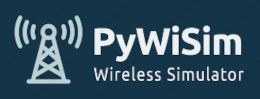

# 1.1 Initial Environment Setup

First of all, you need to upload the folder **simnet** obtained from the repository to the root of your Drive.
By running these commands, you establish a connection between your Colab environment and your Google Drive, enabling you to read from and write files to your Drive. Please run this cell and follow the authentication steps as prompted to grant the necessary permissions.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/linglesloggia/simnet /content/drive/MyDrive/simnet

In [ ]:
'''This ensures that Python can locate and import the necessary modules for the
session.'''

import sys

simnet_path = '/content/drive/MyDrive/simnet'
simnet_path2 = '/content/drive/MyDrive/simnet/extensions/sim5gnr/gui'
if simnet_path not in sys.path:
    sys.path.append(simnet_path)

if simnet_path2 not in sys.path:
    sys.path.append(simnet_path2)

In [ ]:
from extensions.sim5gnr.gui.AppCmd import *

# 2.1 Configuring a 5G Network Scenario

To understand how the simulator works, we must first discuss scenario creation in PyWiSim. A scenario is constructed by creating various instances and linking them to enable communication.

Our scenario is centered around four key components:


*   **Base Station:** The central hub that connects all UEs and facilitates communication.
*   **Slices:** Logical divisions within the network that provide isolation and dedicated resources to different types of traffic. In this notebook, we will only work with one slice, but it is possible to define as many as desired, each with different characteristics.
*   **User Groups:** Collections of UEs that share similar characteristics and requirements.
*   **UEs (User Equipments):** The end-users of the network who access services and applications.


The UEs represent the final recipients of the services provided by the network. They interact with the network to send and receive data.

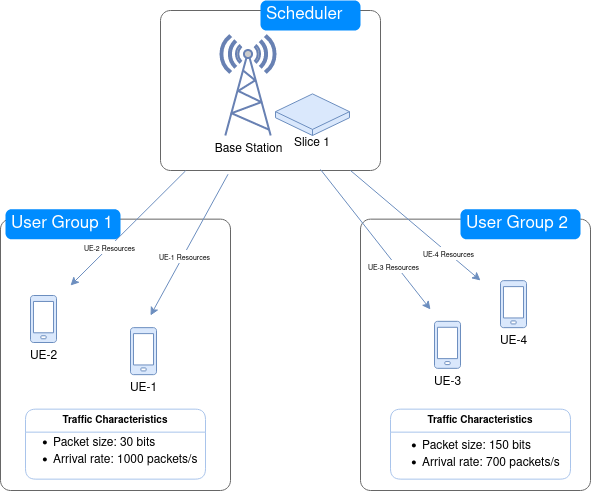

### Creating the network elements

The following cell contains a series of commands for configuring a scenario in the PyWiSim network simulator. These commands specify the base station, slices, user groups, and available resources for the simulation.

First it is created a base radio called BS-1 that has a single slice; it will work with downlink traffic and will use a Round Robin type scheduler. The wireless channel is random. The simulation duration to 100 miliseconds.


Next, the two user groups are created. Both have two associated UEs that generate traffic with a Fixed (or Poisson) distribution. Users in group UG-1 generate traffic with packet size of 200 bits and average inter-arrival time of 1 ms. Those in group UG-2 of 300 bits and average inter-arrival time of 1 ms.

Finally, the amount of available resources is defined, in this case 10 resources for downlink.

In [ ]:
pywisim(['--set-basestation', 'SU', '1', 'n258', 'BS-1', 'False', 'False', 'False', 'True', '10', 'round robin', "random or fixed", 'Random'])

pywisim(['--set-uegroup', '0', 'UG-1', '60', '200', '1', 'fixed', '2'])

pywisim(['--set-uegroup', '1', 'UG-2', '60', '300', '1', 'fixed', '2'])

pywisim(['--set-resources', '0', 'PRB', 'PRB', '10', '0', '14'])

We can see the scenary created by running the following cell:

In [ ]:
pywisim(['--view-config'])

     UserEq UE-1, v_pos=[0 0 0], v_vel=[0 0 0]
--- File ChannelEnvironment created
--- Making dict for all UEs from file  None



Now, let us run the simulation by executing the following cell:

In [ ]:
pywisim(['--run-simulation', 'False'])

--- File ChannelEnvironment created



# Simulation's final results

The simulation's results can be found at

> /content/drive/MyDrive/simnet/extensions/sim5gnr/data

Each file within represents a different meassure,




We display the simulation's final results and queue states, show the duration, and provide a summary of total statistics using the '--process-and-graph-data' argument. This argument will lead to a specific subplot, where:

    Selection = 0 plots Bits Received
        Subselection = 1 also plots Bits Dropped
    Selection = 1 plots Bits Sent
        Subselection = 0 plots Bits Lost
    Selection = 2 plots TB Bits per TTI and Resources per TTI
    Selection = 3 plots Bits in Queue per TTI, Packets in Queue per TTI,
                and Average Packet Delay in Queue per TTI
    Selection = 4 plots TB Bits per UEGroup per TTI and Resources per UEGroup per TTI
    Selection = 5 plots Bits in Queue per UEGroup per TTI, Packets in Queue per UEGroup per TTI,
            and Average Packet Delay in Queue per UEGroup per TTI





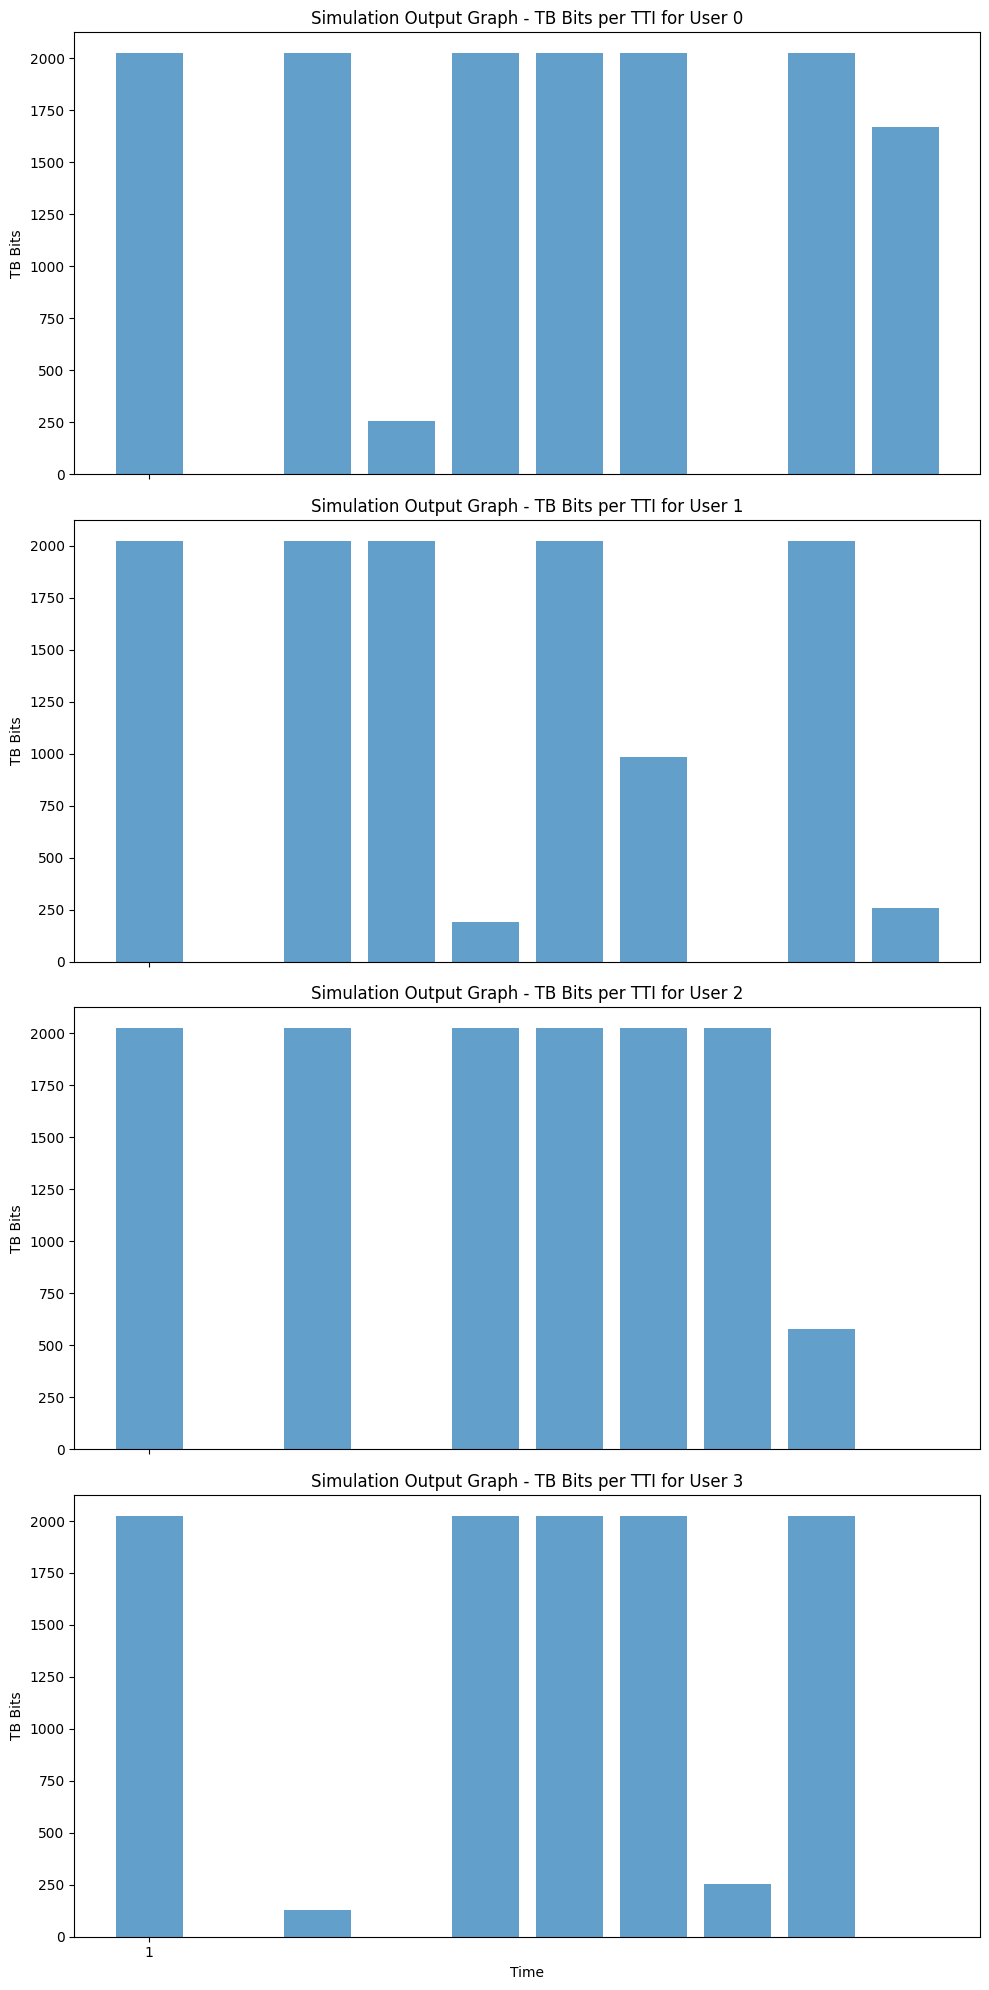

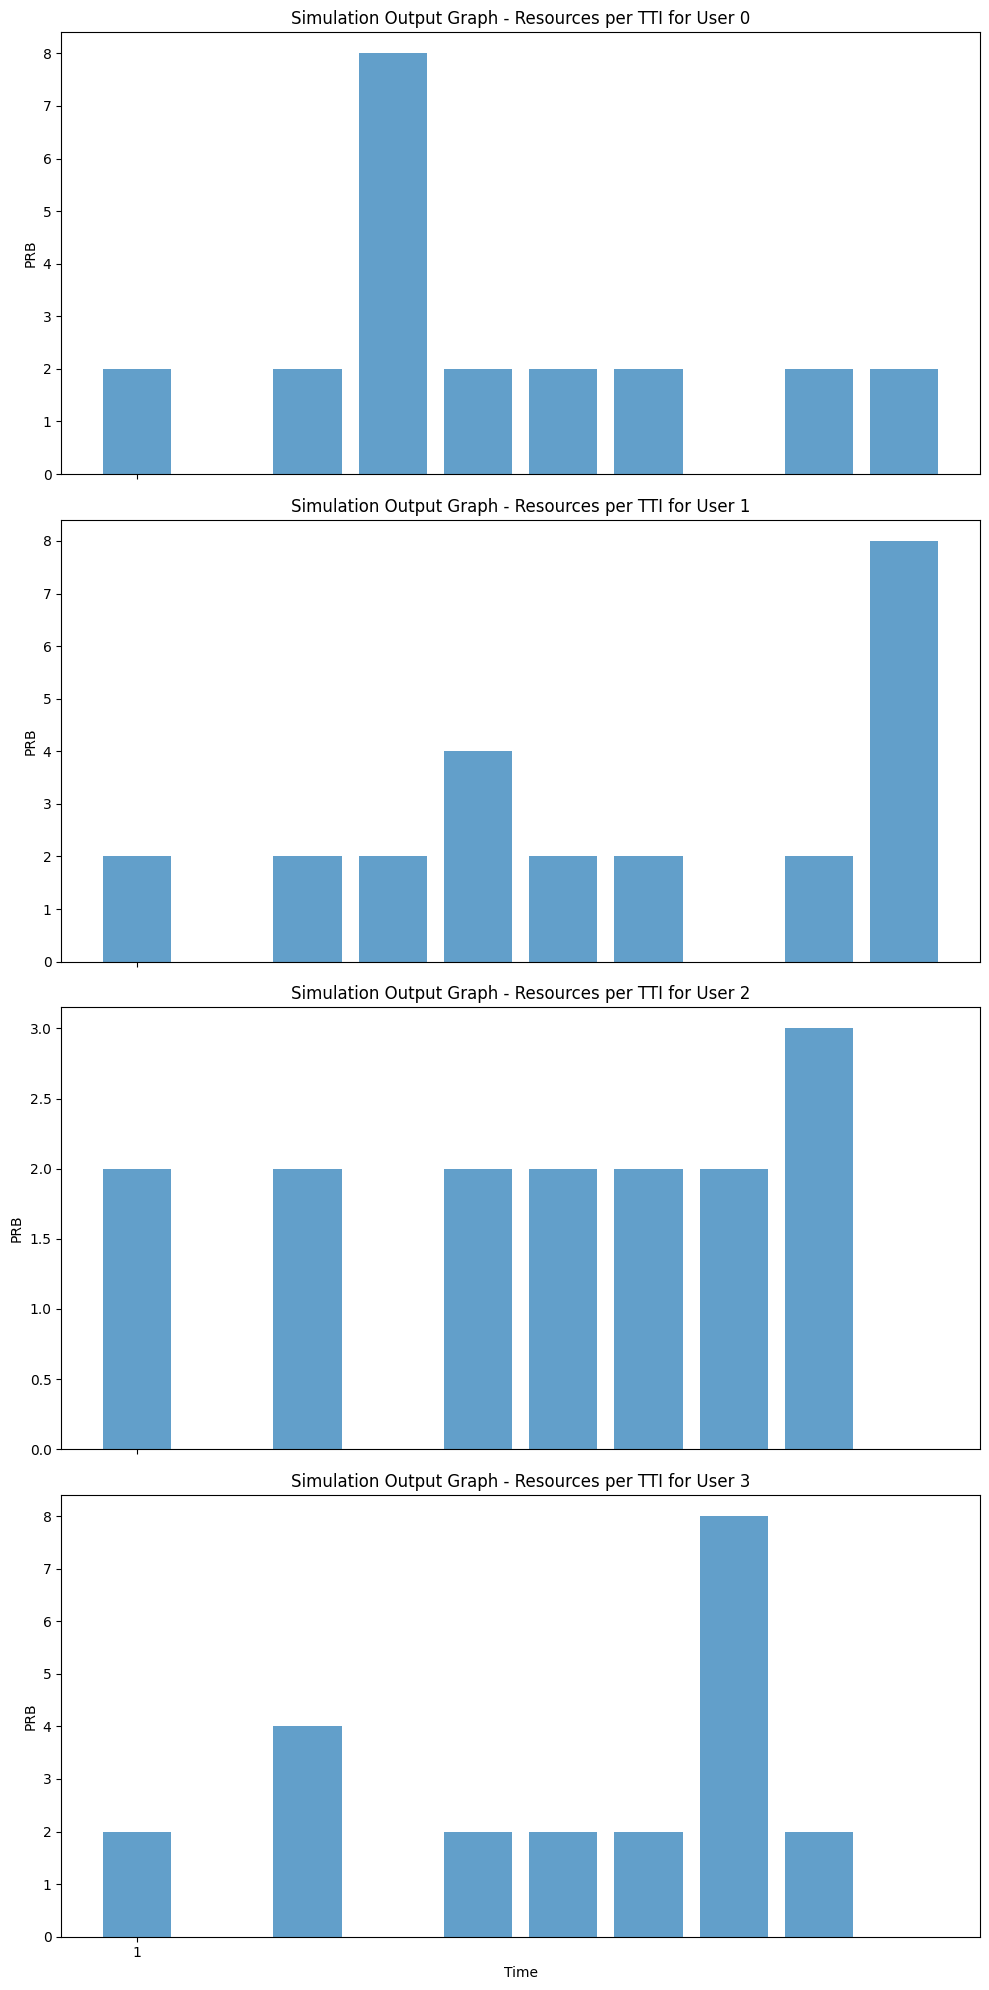

In [ ]:
pywisim(['--process-and-graph-data',  '2', '0', 'Simulation Output Graph'])

# Exploring the Scheduler possibilities

Schedulers play a crucial role in managing time and frequency resources within our network. The more resources we allocate, the higher the throughput users can achieve. Additionally, faster resource assignment reduces user delay.

Schedulers balance the need for high data rates and low latency, directly impacting the user experience. By testing different scheduling strategies, we can see how various allocations affect network efficiency and user satisfaction. This helps us optimize resource distribution effectively.

**To Do:**

  

1.   Change the resource allocation algorithm in '--set-basestation' in Section 2 You can try "round robin", "simple", "maxcqi" or "proportional fair".

2. Experiment with different configurations for the number of users and resource blocks available.

3. Experiment with different channel models. You can try "random or fixed" or "file".

4.   Analyze the results to see how different algorithms affect network performance, such as throughput and latency. Analyze the outcomes to understand their impact on network performance.






# Machine Learning-Driven Resource Allocation for 5G Networks

In 5G networks, efficient resource allocation is crucial. Traditional methods often fail to adapt to the dynamic nature of these networks. An in this sense, machine learning offers a solution.

By using machine learning algorithms, we can create intelligent resource allocation strategies that adjust to changing network conditions, user demands, and service requirements. We will model the resource allocation problem as a Markov Decision Process (MDP), which is ideal for decision-making in dynamic environments.

This section will cover our machine learning-driven resource allocation algorithm, detailing the MDP formulation, state space, action space, and reward function. We will develop a reinforcement learning algorithm and evaluate its performance through simulations using the PyWiSim network simulator, showing its effectiveness in improving resource utilization and network performance.

### Setting up the Learning-Driven Scheduler

To create a reinforcement learning (RL) model of a 5G environment, we first define the components of our model: the agent and the environment. The environment represents the 5G network, including base stations, user devices, and network conditions. The agent interacts with this environment by observing the current state, which includes data like buffer statuses. Based on this state, the agent takes actions, such as scheduling resource allocations. These actions influence the network performance, which is then fed back to the agent as a reward signal, guiding future decisions. By iteratively learning from this feedback loop, the agent develops strategies to optimize resource allocation, balancing throughput and latency to enhance overall network performance. This process is depicted in the diagram, illustrating the continuous interaction between the agent and the environment within the RL framework.




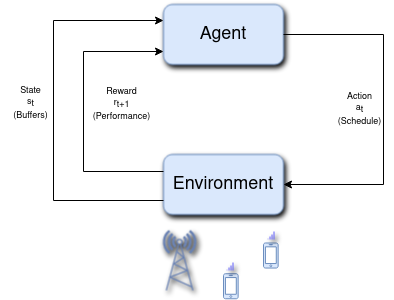


## MDP Model

Time is divided into discrete time slots (TTIs). Our system has $N$ User Equipments (UEs) and $M$ Resource Blocks (RB). At each time slot, each RB is allocated to one UE, represented by matrix $\mathbf{a}$. In $\mathbf{a}$, $a_{j,i}=1$ if PRB $j$ is allocated to UE $i$, and 0 otherwise.

The problem is modeled as an MDP $\mathcal{M} = (\mathcal{B}, \mathcal{A}, \mathbf{P}, \mathbf{c})$:

- **State**: UEs Buffer sizes $b = (b_i)_{i=1}^N$ with $0 \leq b_i \leq B$, so $\mathcal{B} = \{0, \ldots, B\}^N$
- **Action**: Allocation value $a$ corresponding to the user's index which is going to have the resources
- **Cost Function**: The sum of UEs Buffer sizes



We built a DQN algorithm taking the MDP model, that can be found at



> /content/drive/MyDrive/simnet/models/scheduler/dqnscheduler

Feel free to experiment with it.

Les us start over and create a new scenario with the DQN scheduler:

In [ ]:
pywisim(['--set-basestation', 'SU', '1', 'n258', 'BS-1', 'False', 'False', 'False', 'True', '100', 'dqn', "random or fixed", 'Random'])

pywisim(['--set-uegroup', '0', 'UG-1', '60', '300', '1', 'fixed', '2'])

pywisim(['--set-uegroup', '1', 'UG-2', '60', '300', '5', 'fixed', '2'])

pywisim(['--set-resources', '0', 'PRB', 'PRB', '100', '0', '14'])

pywisim(['--view-config'])

     UserEq UE-1, v_pos=[0 0 0], v_vel=[0 0 0]
     TrafficGenerator simple TG-1, gen size 300, delay 1, pkts 1
     UserEq UE-2, v_pos=[0 0 0], v_vel=[0 0 0]
     TrafficGenerator simple TG-2, gen size 300, delay 1, pkts 1
     UserEq UE-3, v_pos=[0 0 0], v_vel=[0 0 0]
     TrafficGenerator simple TG-3, gen size 300, delay 5, pkts 1
     UserEq UE-4, v_pos=[0 0 0], v_vel=[0 0 0]
     TrafficGenerator simple TG-4, gen size 300, delay 5, pkts 1



Now, let us run the simulation with the dqn scheduler by executing the following cell:

In [ ]:
pywisim(['--run-simulation', 'False'])

# DQN Simulation final results

We display the simulation's final results and queue states, show the duration, and provide a summary of total statistics.

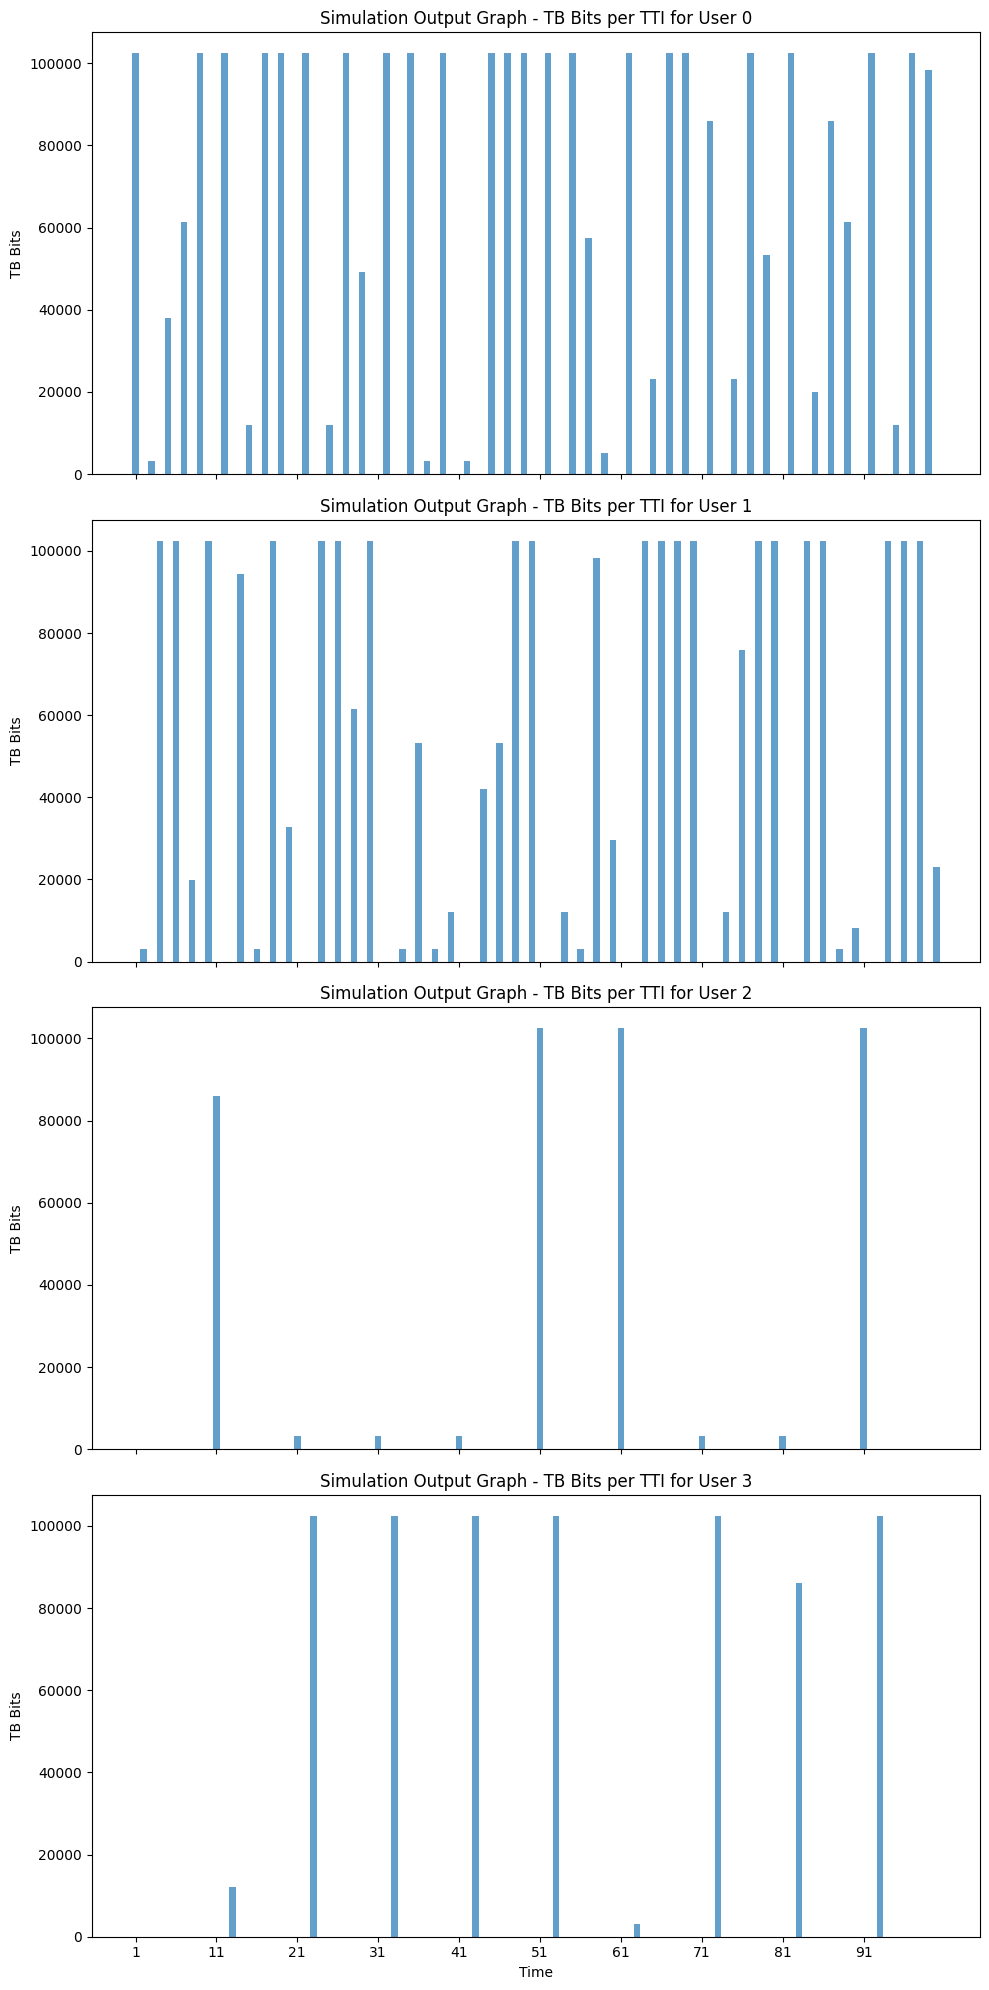

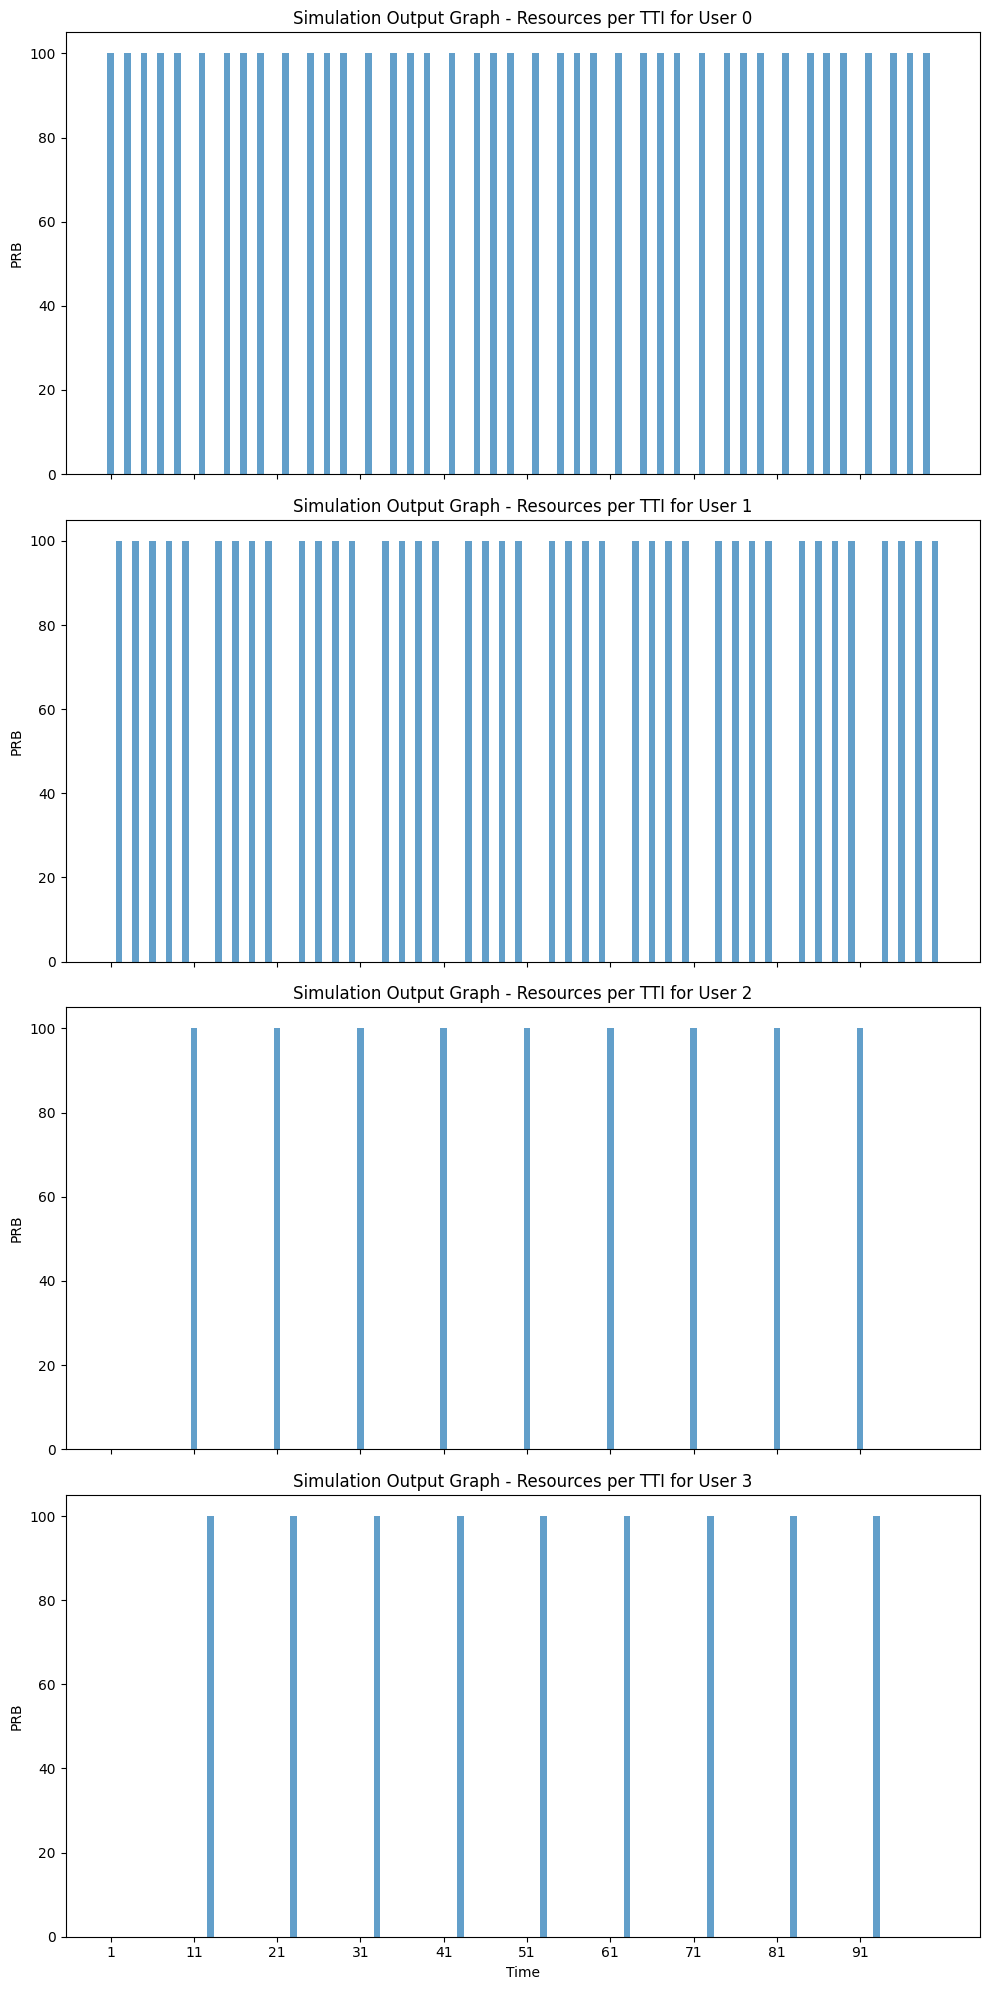

In [ ]:
pywisim(['--process-and-graph-data',  '2', '0', 'Simulation Output Graph'])

if we analyse the schedulers from last section, we can conclude that there is no differenciation between requirements. We could manage to work a solution to obtain an scheduling policy according to our needs. We have built a simple reinforcement learning solution that learns to reduce the delay between users.

To cite PyWiSim project please use the following information: Victor González Barbone, Pablo Belzarena, Lucas Inglés and Claudina Rattaro PyWiSim-Python Wireless Simulator, version 1.0 Summer School on Dynamic resource allocation problems in communication networks June 25-27, 2024 IMT Atlantique, Brest, France, release date 24/06/24, https://github.com/linglesloggia/simnet